In [1]:
from GMM_model import *

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
selected_clusters = ['NGC_2682', 'NGC_6791', 'NGC_2243', 'NGC_2141',
                     'NGC_6823', 'NGC_6231', 'IC_1805', 'NGC_1893',
                     'NGC_581']

In [3]:
all_stars = {}
gmm_models = {}
cantat_members = {}

In [24]:
def gmm_analysis(cluster_name, search_radius = 0.5, visualize_member = False, member_cutoff = 0.9,
                save_member = True):
    
    # Get GAIA data and run GMM model
    all_stars[cluster_name] = get_GAIA_data(cluster_name, radius = search_radius)
    gmm_models[cluster_name] = get_GMM_member(cluster_name, all_stars[cluster_name],
                                          member_cutoff=member_cutoff, visualize_member = visualize_member)
    
    # save the members
    if save_member:
        gmm_models[cluster_name].save_members(cluster_name+'_gmm_members.csv', index = False)
    
    # compare with Cantat
    cantat_members[cluster_name] = get_cantat_data(clusters = cluster_name)
    compare_with_cantat(cluster_name, cantat_members[cluster_name], gmm_models[cluster_name].member)
    
    

Object Name: NGC_2682
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (132.846, 11.814)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 19423


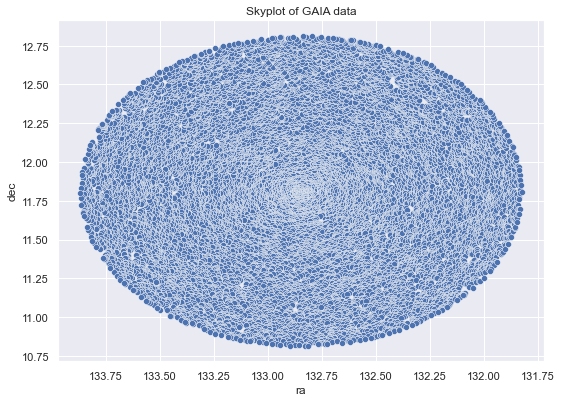

Number of stars after applying noise filter: 7214
Number of stars after applying other filters: 6343


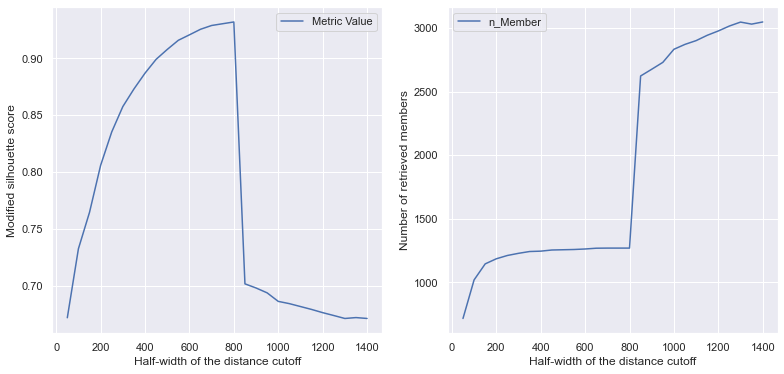

best distance half-width: 800.0


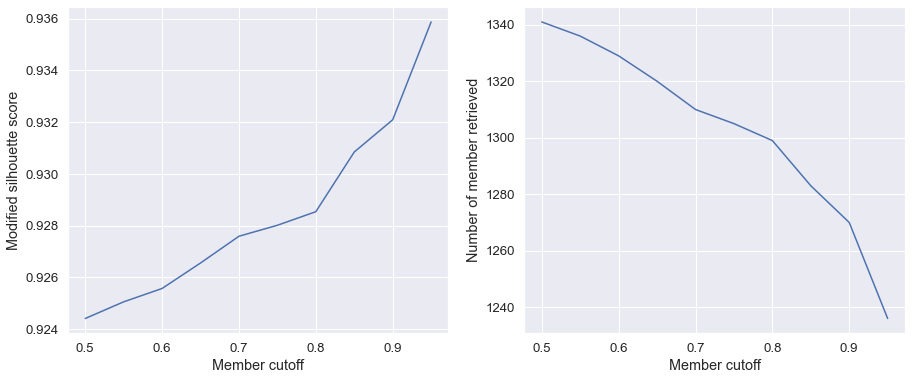

best member threshold: 0.95
number of member: 1236,
 number of field star: 3873,
 MSS: 0.94


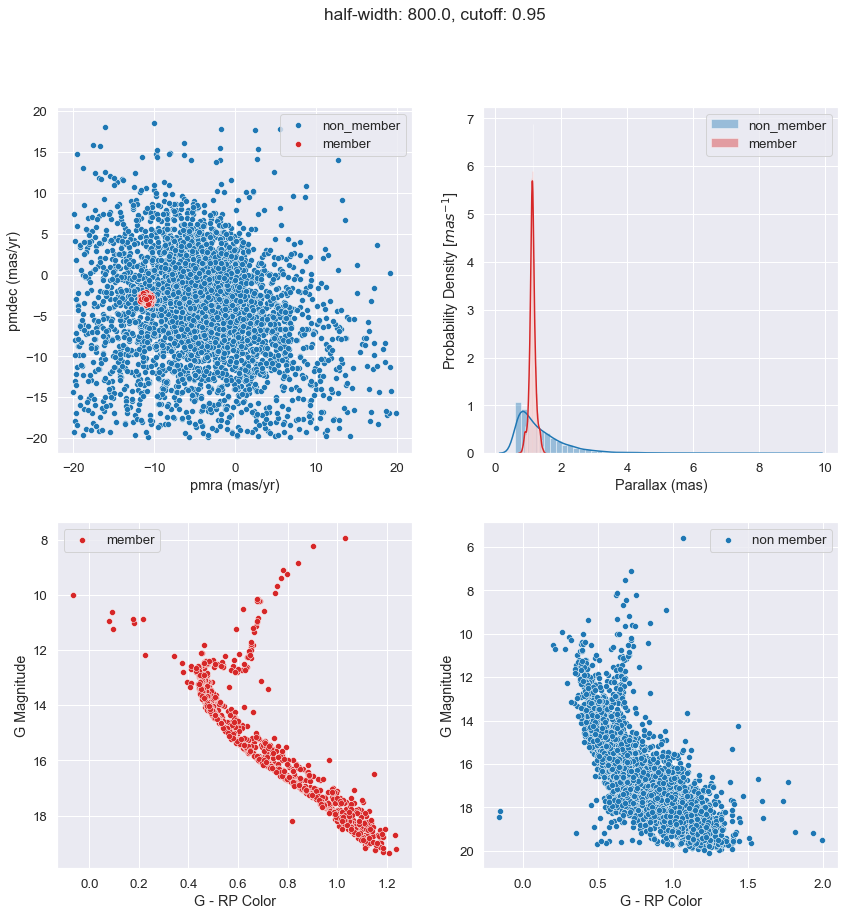

Cluster: NGC_2682
member_by_GMM    1236
cantat            848
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 691




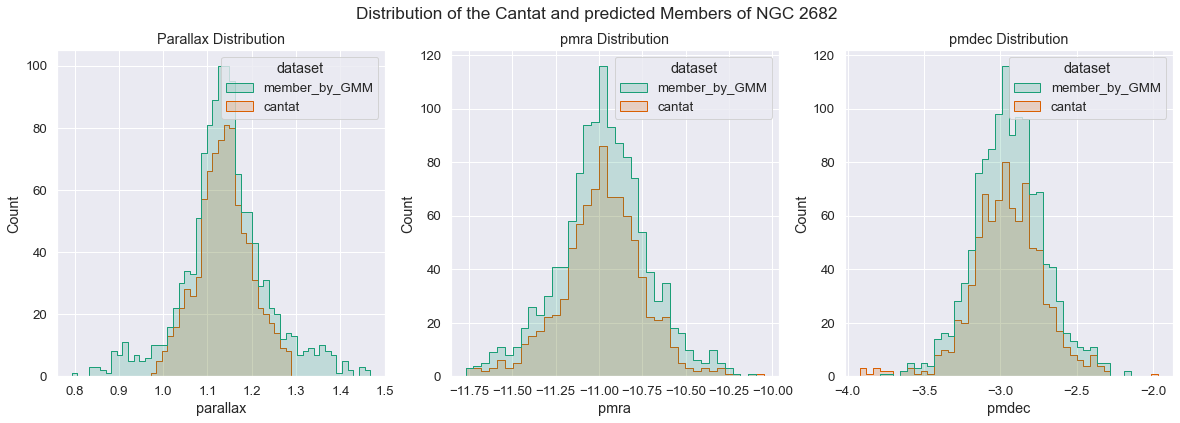

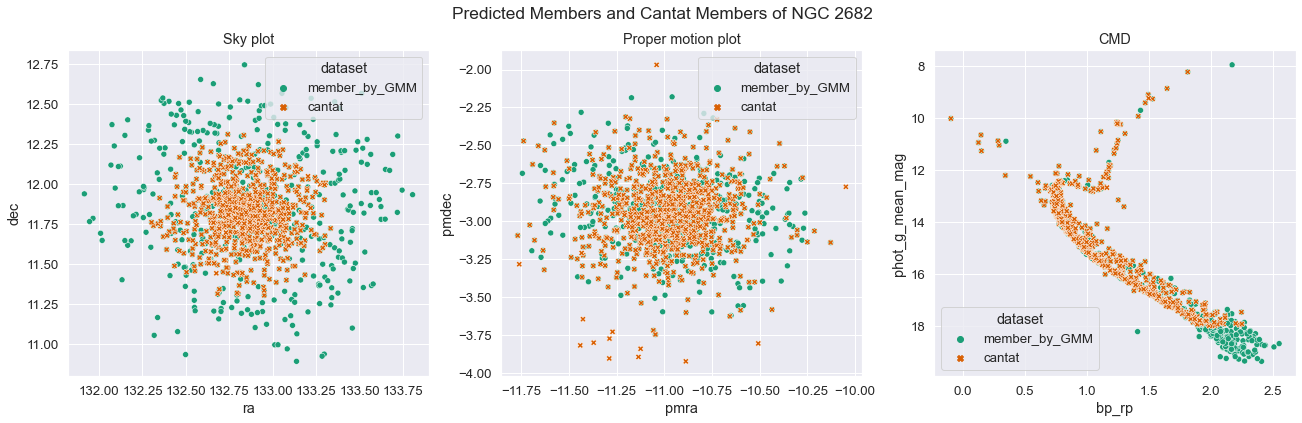

NameResolveError: All Sesame queries failed. Unable to retrieve coordinates. See errors per URL below: 
 http://cdsweb.u-strasbg.fr/cgi-bin/nph-sesame/A?NGC_6791: [Errno 11001] getaddrinfo failed
http://vizier.cfa.harvard.edu/viz-bin/nph-sesame/A?NGC_6791: [Errno 11001] getaddrinfo failed

In [6]:
for i in range(len(selected_clusters)):
    cluster_name = selected_clusters[i]
    if i==0:
        gmm_analysis(cluster_name, search_radius = 1)
    else:
        gmm_analysis(cluster_name)

Object Name: NGC_6791
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (290.221, 37.778)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 56907


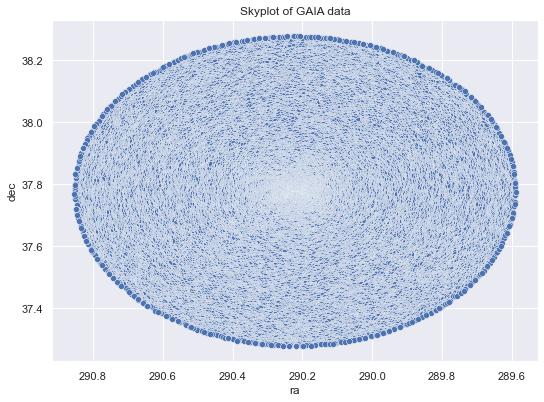

Number of stars after applying noise filter: 11641
Number of stars after applying other filters: 11120


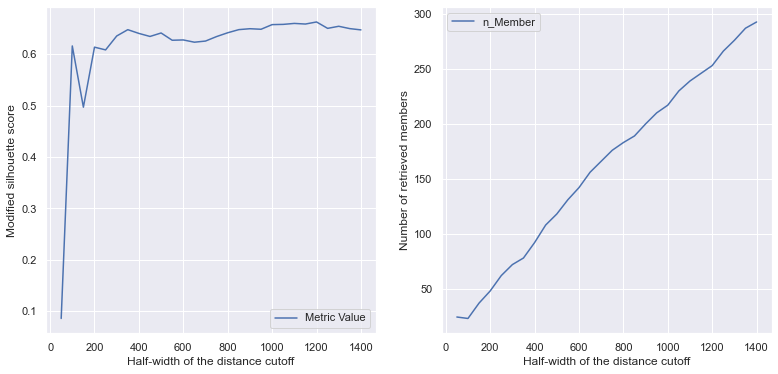

best distance half-width: 1200.0


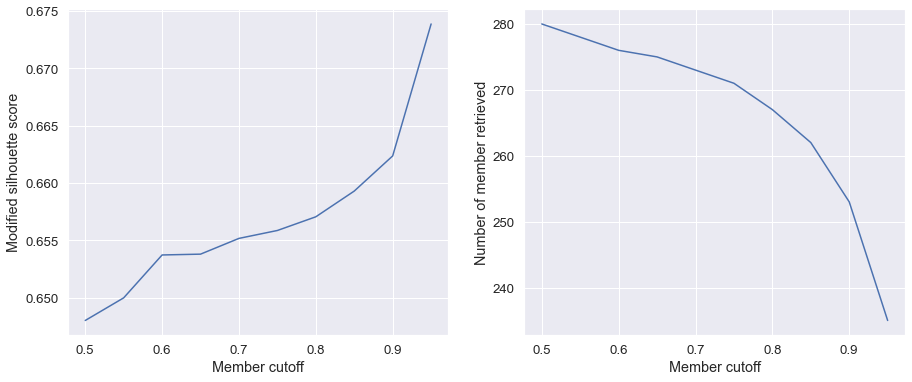

best member threshold: 0.95
number of member: 235,
 number of field star: 1266,
 MSS: 0.67


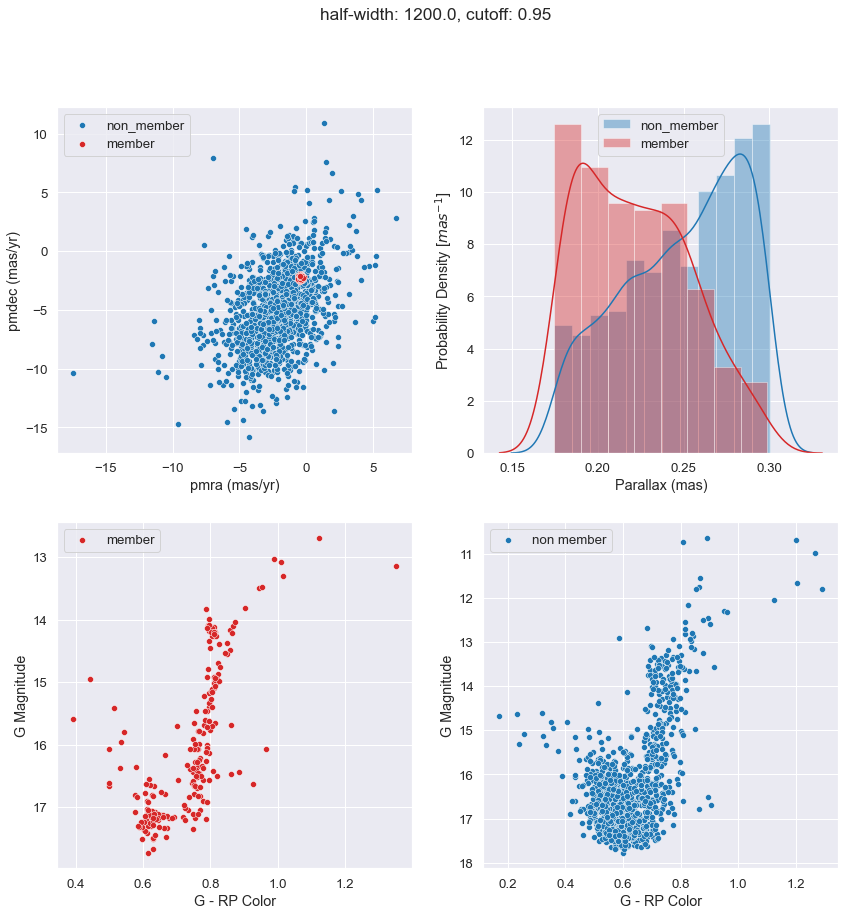

Cluster: NGC_6791
cantat           1722
member_by_GMM     235
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 1654




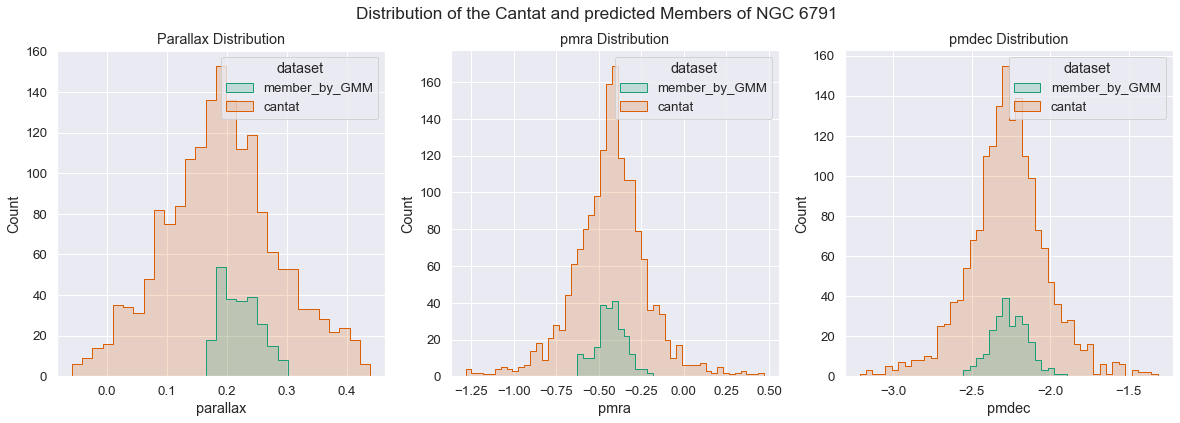

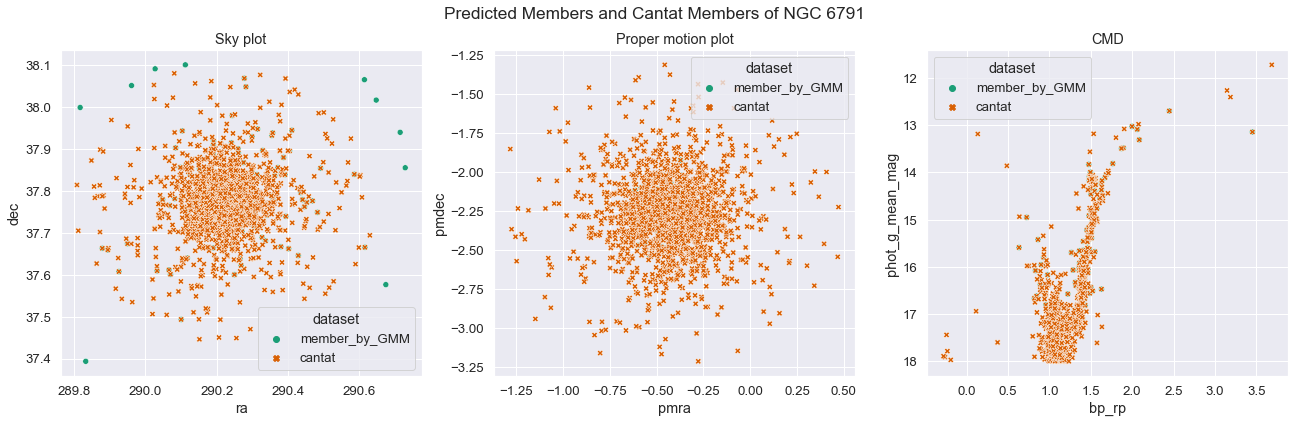

Object Name: NGC_2243
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (97.395, -31.282)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 15806


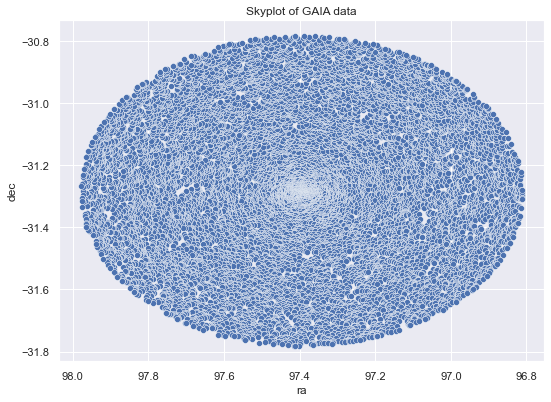

Number of stars after applying noise filter: 4745
Number of stars after applying other filters: 4463


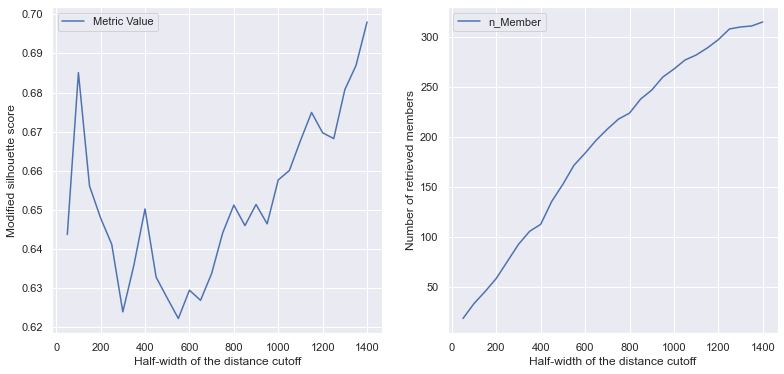

best distance half-width: 1400.0


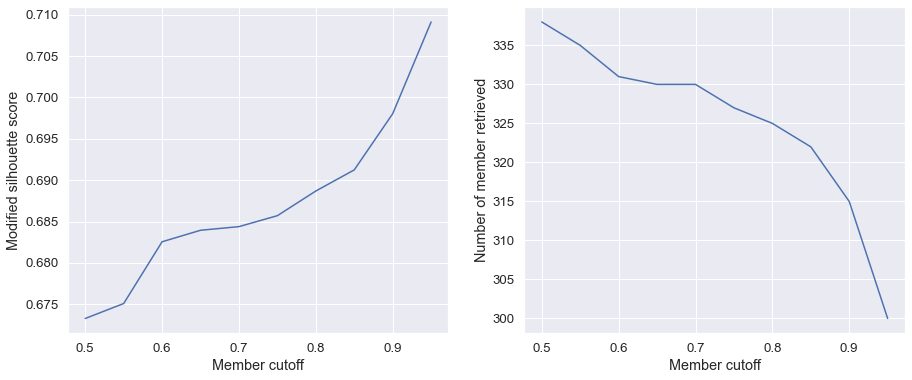

best member threshold: 0.95
number of member: 300,
 number of field star: 594,
 MSS: 0.71


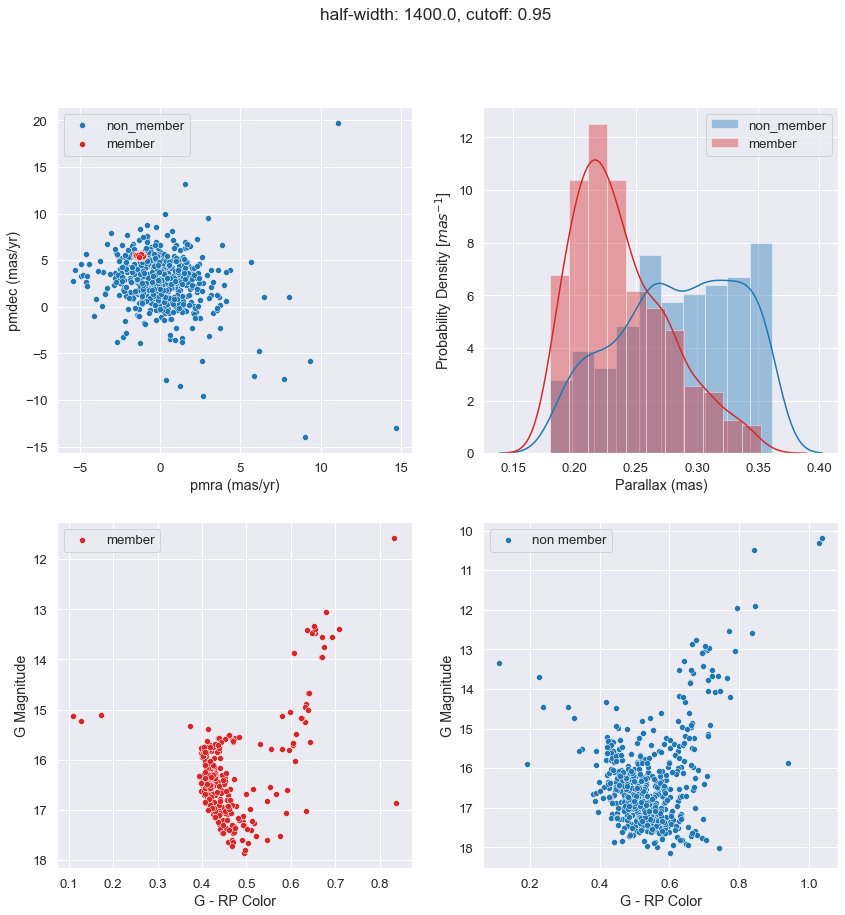

Cluster: NGC_2243
cantat           531
member_by_GMM    300
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 515




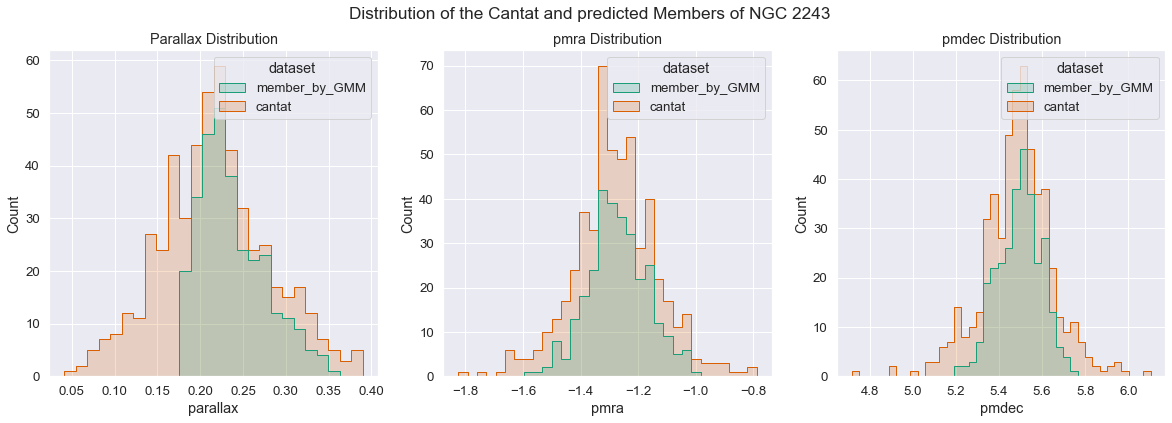

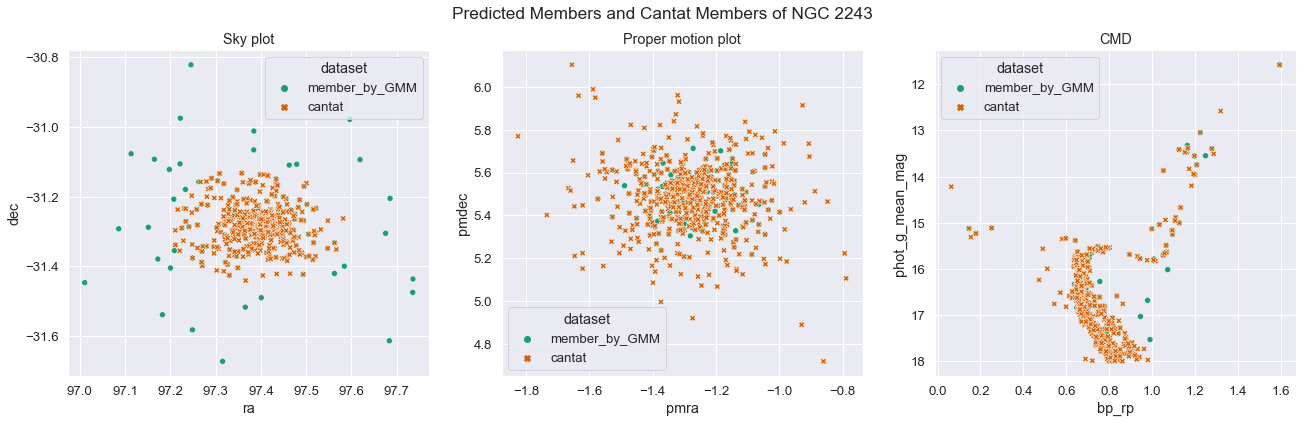

Object Name: NGC_2141
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (90.734, 10.451)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 34722


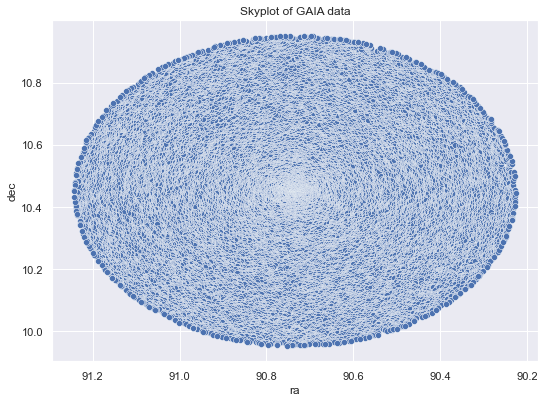

Number of stars after applying noise filter: 6379
Number of stars after applying other filters: 6177


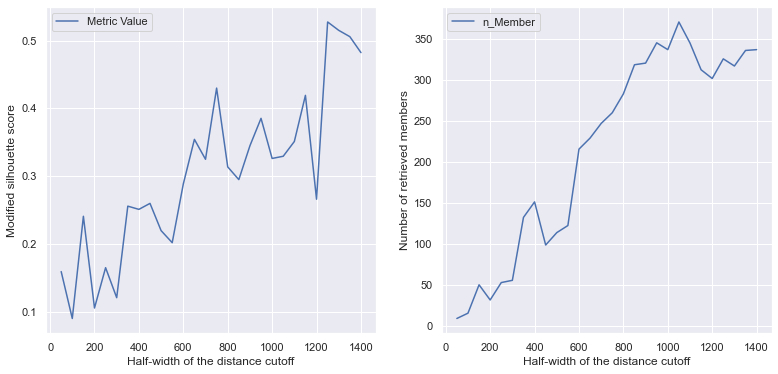

best distance half-width: 1250.0


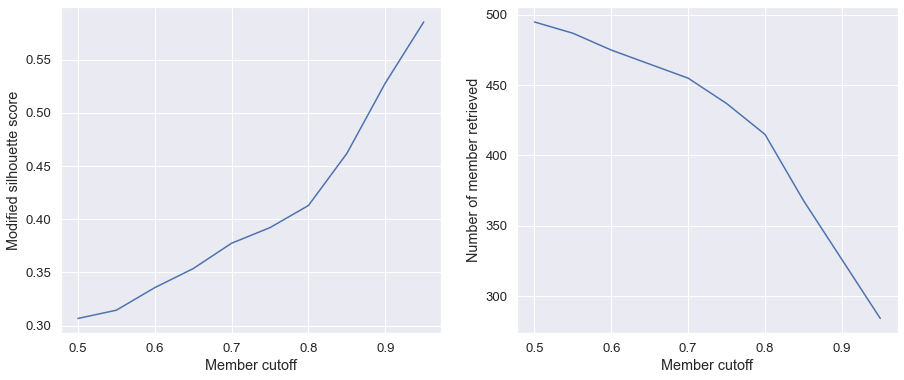

best member threshold: 0.95
number of member: 284,
 number of field star: 25,
 MSS: 0.59


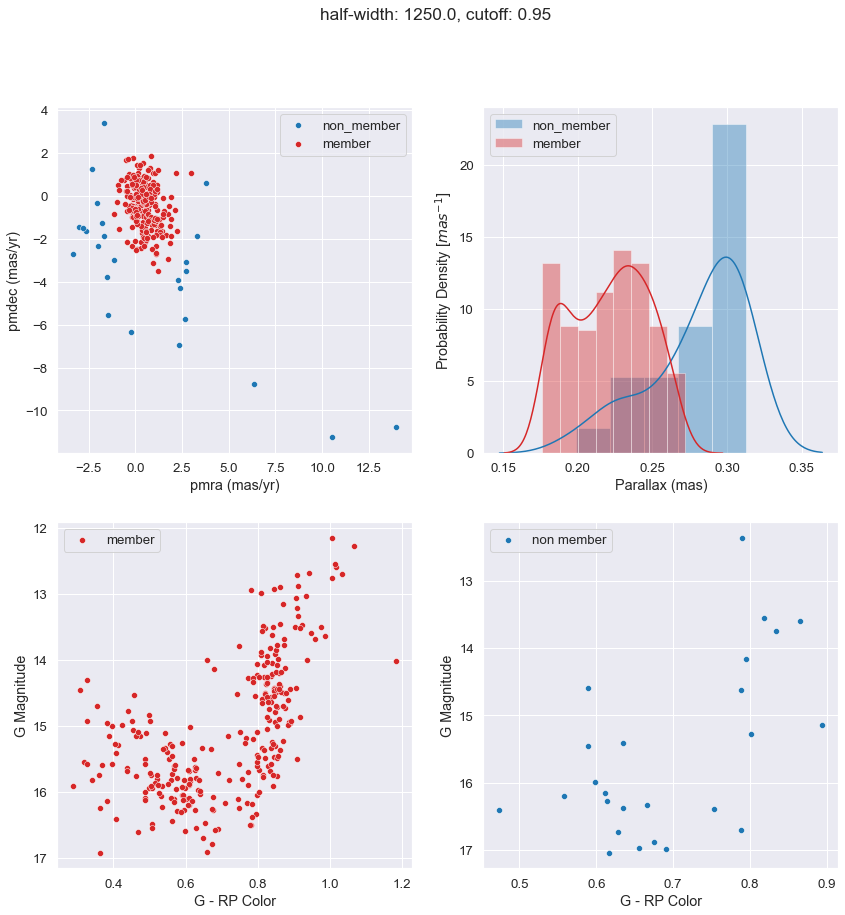

Cluster: NGC_2141
cantat           1727
member_by_GMM     284
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 831




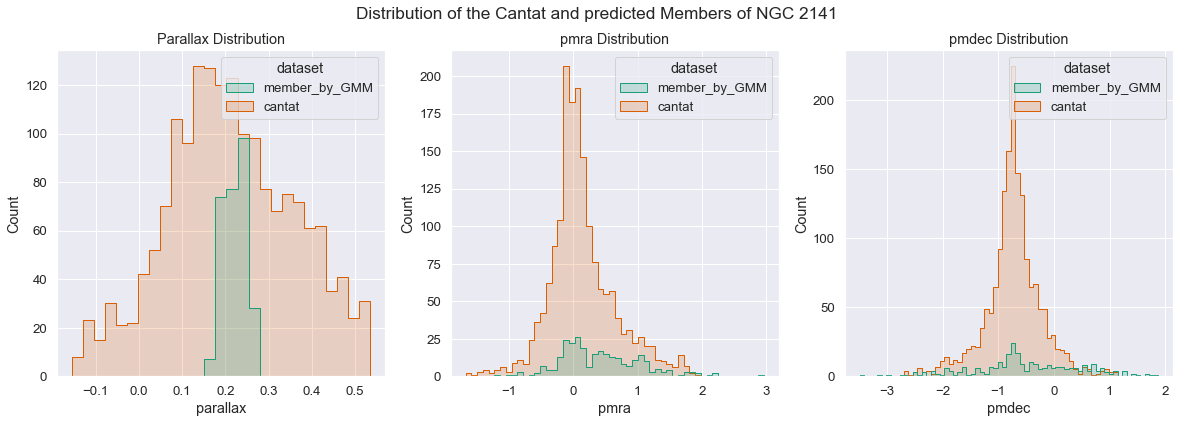

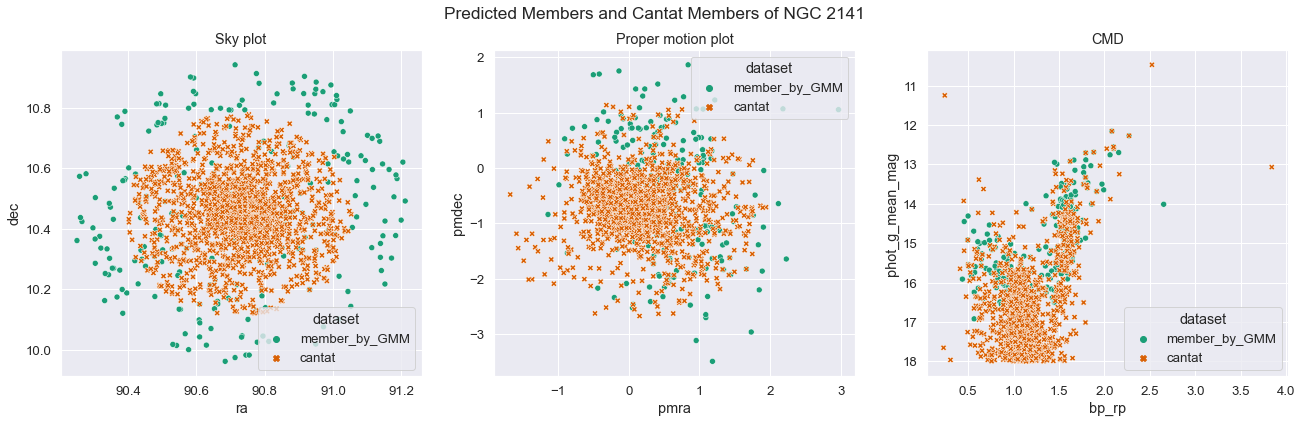

Object Name: NGC_6823
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (295.794, 23.321)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 89652


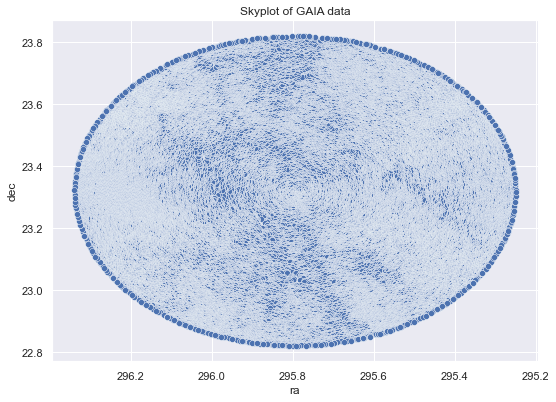

Number of stars after applying noise filter: 12835
Number of stars after applying other filters: 12240


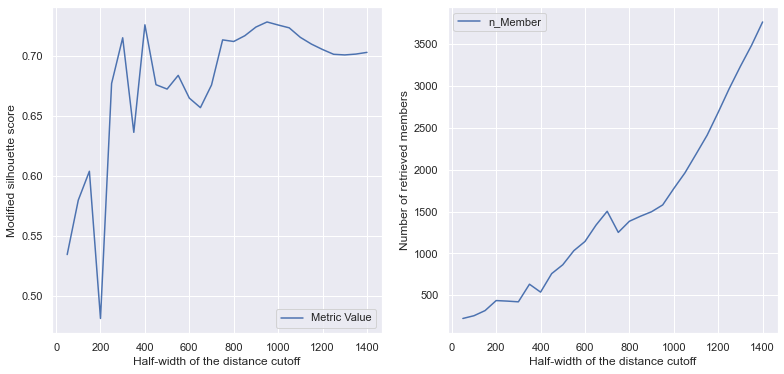

best distance half-width: 950.0


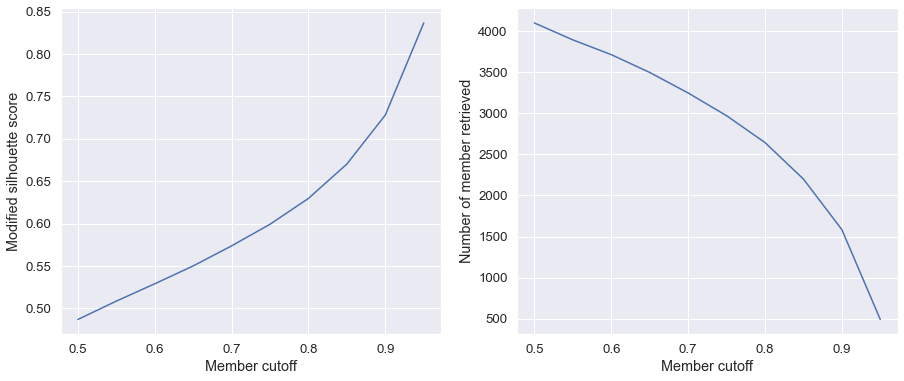

best member threshold: 0.95
number of member: 489,
 number of field star: 1752,
 MSS: 0.84


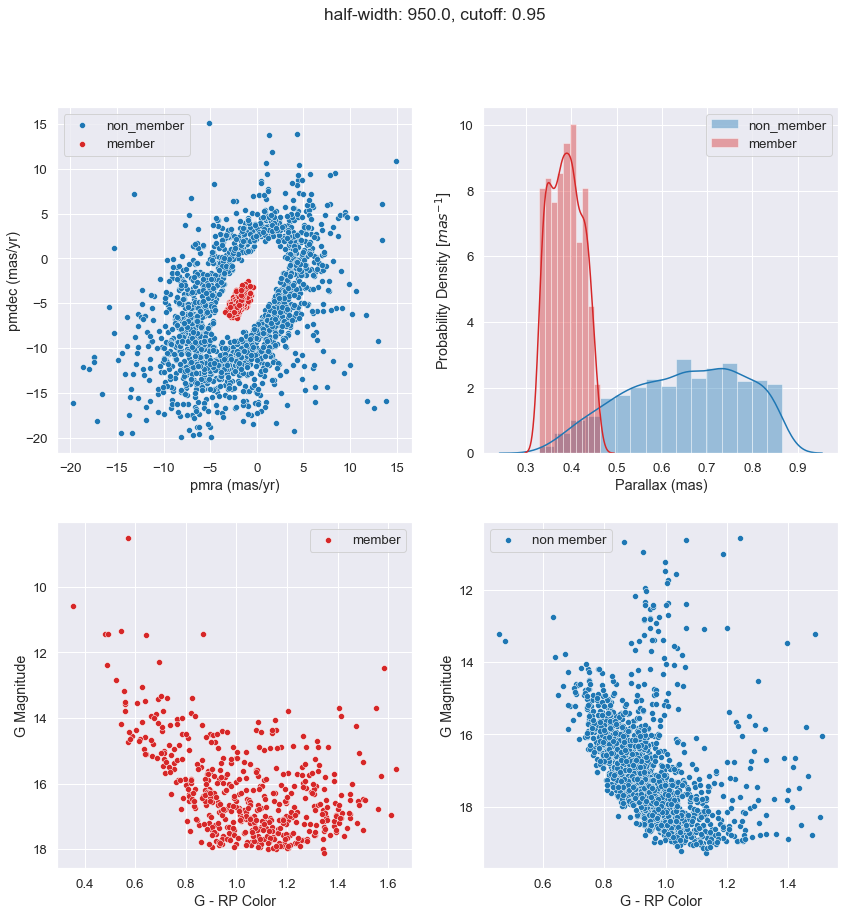

Cluster: NGC_6823
member_by_GMM    489
cantat           236
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 158




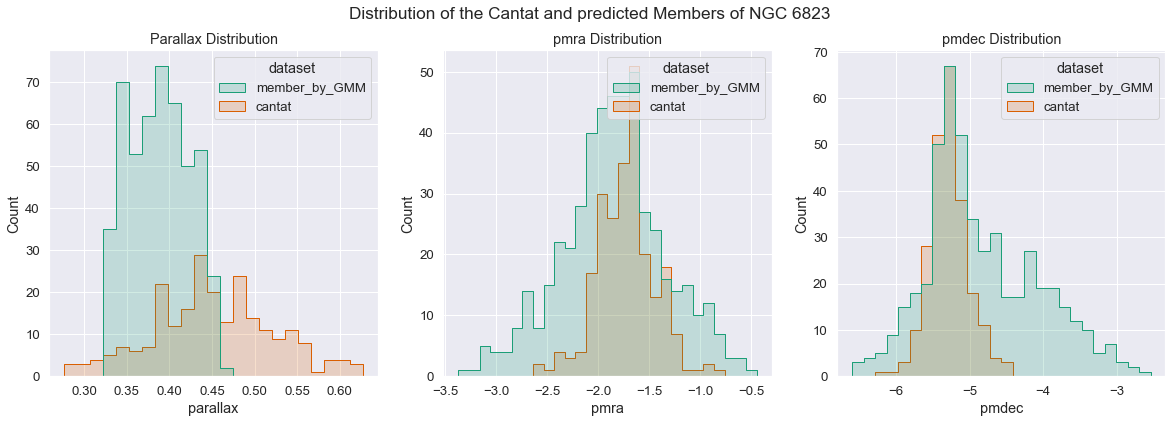

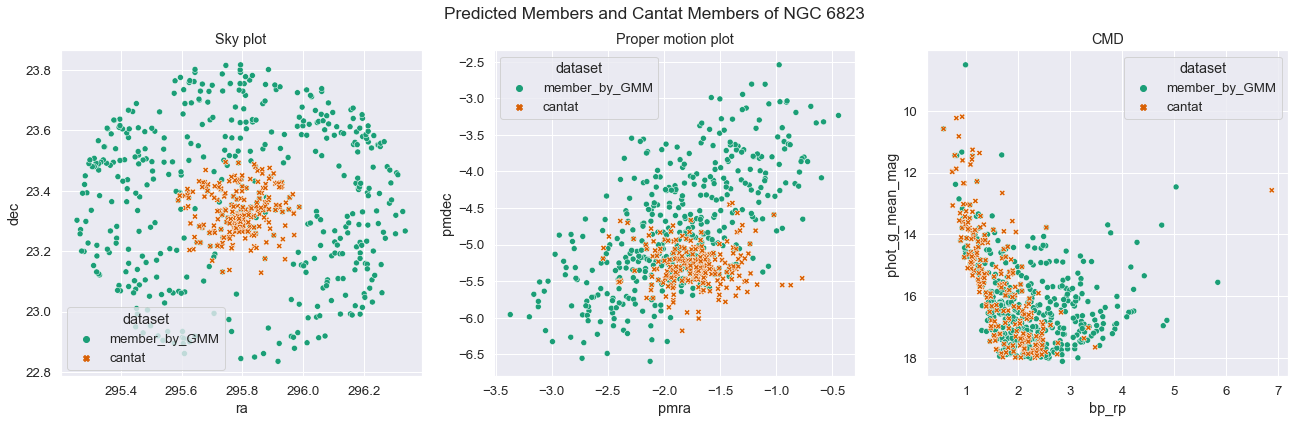

Object Name: NGC_6231
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (253.545, -41.812)>


In [ ]:
for i in range(1, len(selected_clusters)):
    cluster_name = selected_clusters[i]
    gmm_analysis(cluster_name)

In [11]:
gmm_models

{'NGC_2682': <GMM_model.Run_GMM_Model at 0x1ca40631128>,
 'NGC_6791': <GMM_model.Run_GMM_Model at 0x1ca43b759e8>,
 'NGC_2243': <GMM_model.Run_GMM_Model at 0x1ca400ca7f0>,
 'NGC_2141': <GMM_model.Run_GMM_Model at 0x1ca437b60f0>,
 'NGC_6823': <GMM_model.Run_GMM_Model at 0x1ca1a4ac780>}

In [12]:
for model in gmm_models.values():
    print(model)

Object Name: NGC_6231
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (253.545, -41.812)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 128445


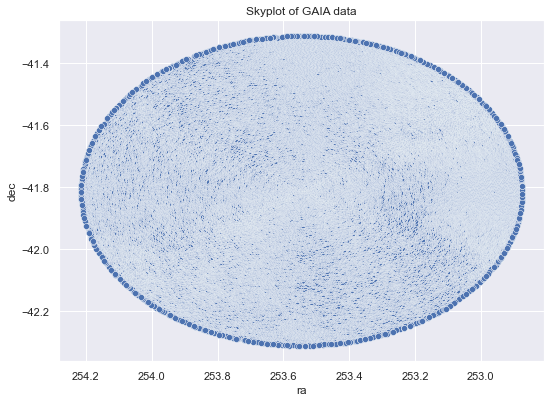

Number of stars after applying noise filter: 18809
Number of stars after applying other filters: 18178


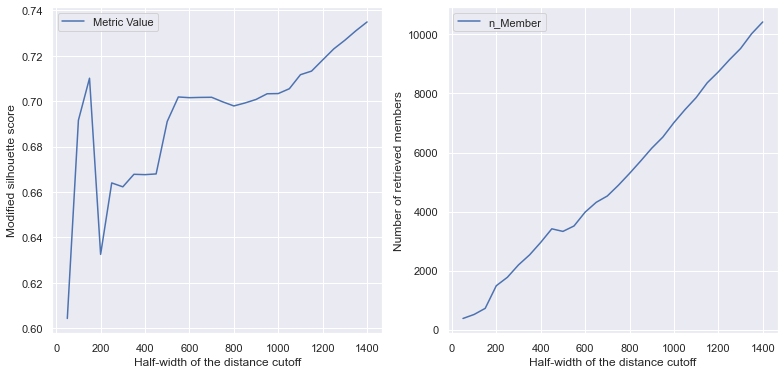

best distance half-width: 1400.0


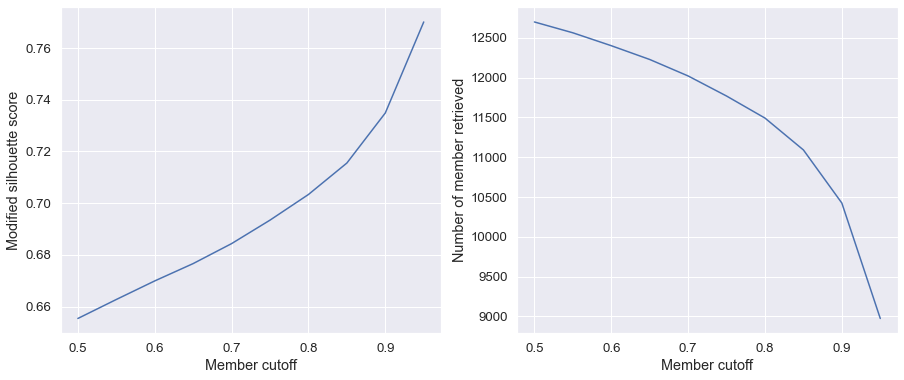

best member threshold: 0.95
number of member: 8975,
 number of field star: 3388,
 MSS: 0.77


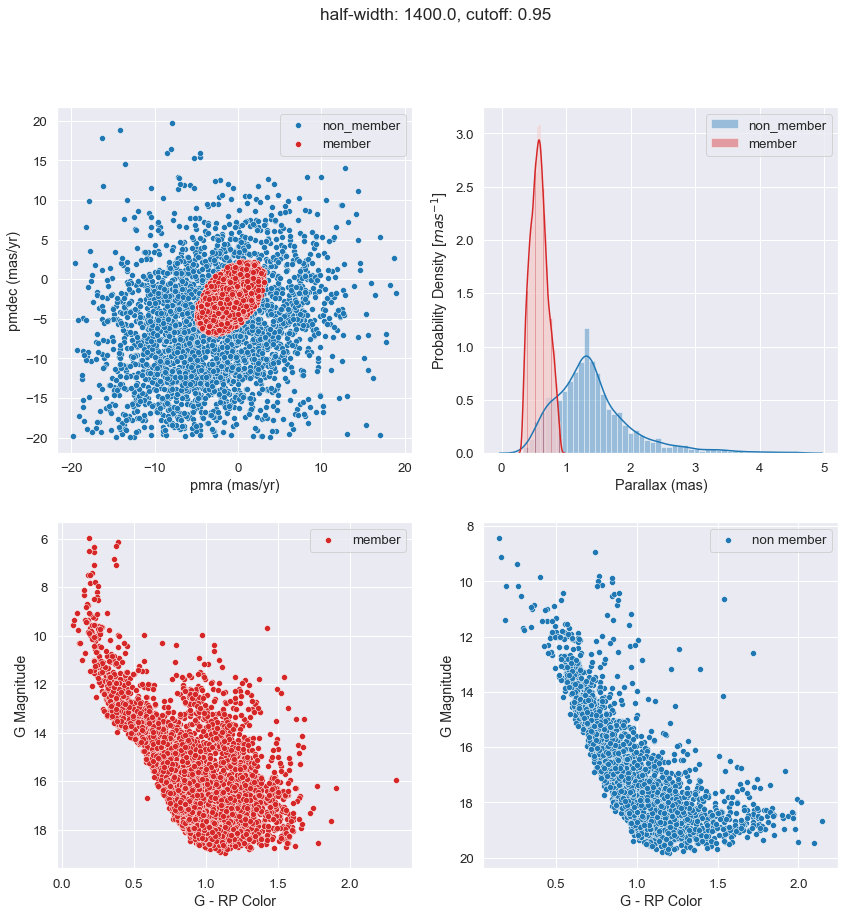

Cluster: NGC_6231
member_by_GMM    8975
cantat           1580
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 653




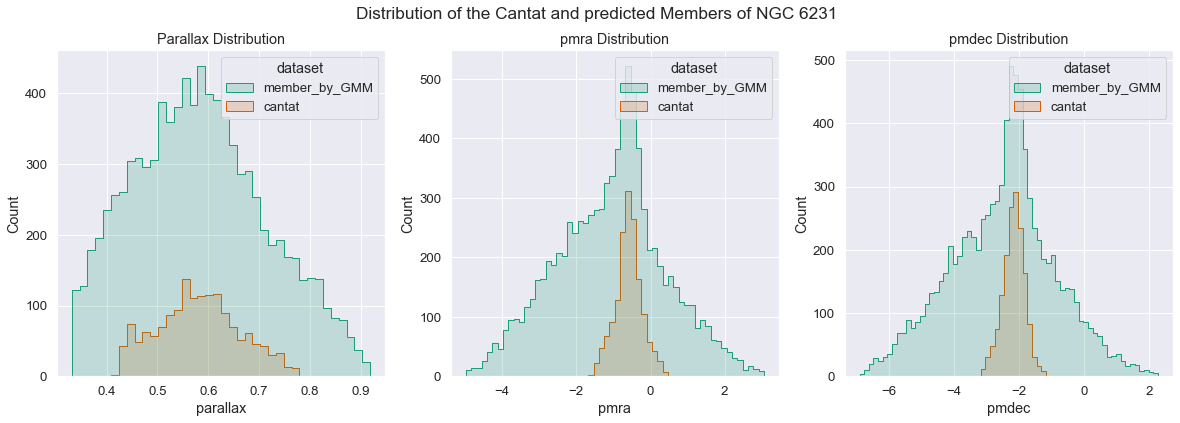

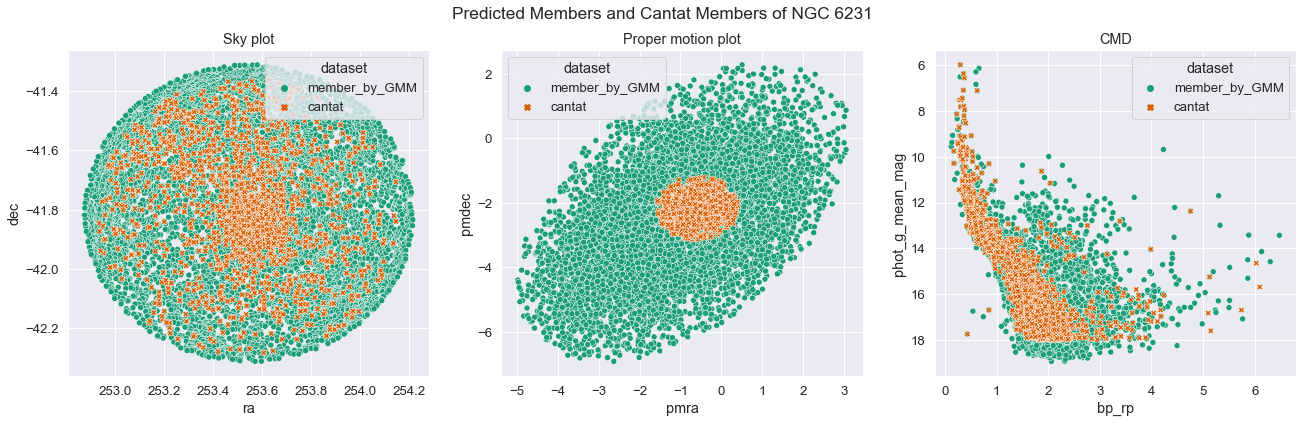

Object Name: IC_1805
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (38.21, 61.471)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 46942


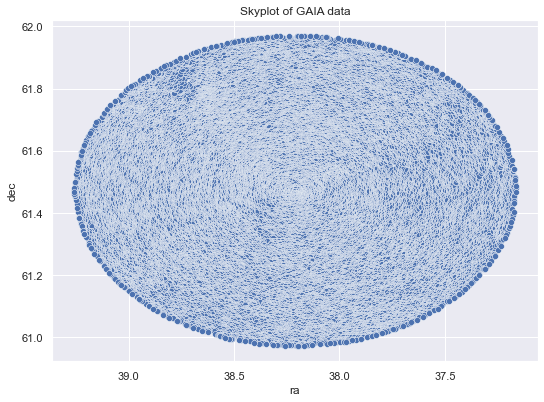

Number of stars after applying noise filter: 8514
Number of stars after applying other filters: 8235


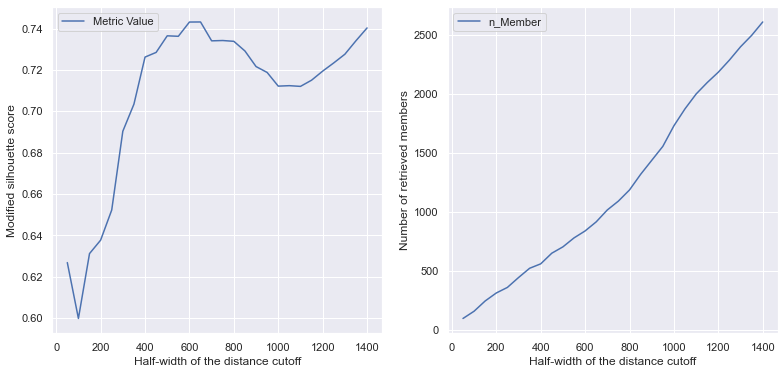

best distance half-width: 650.0


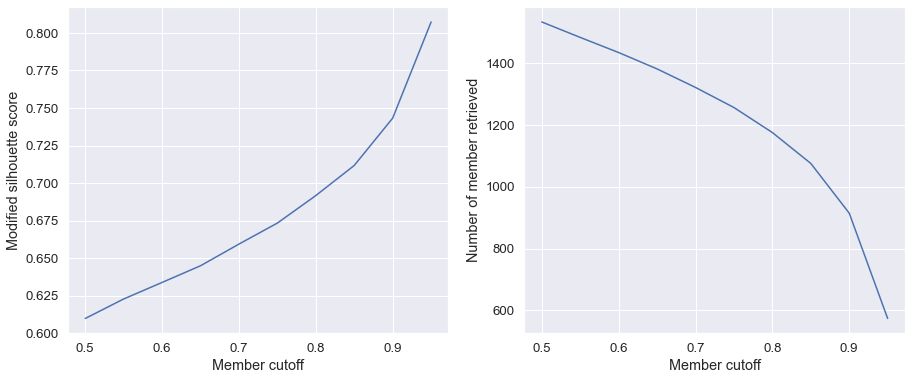

best member threshold: 0.95
number of member: 574,
 number of field star: 1245,
 MSS: 0.81


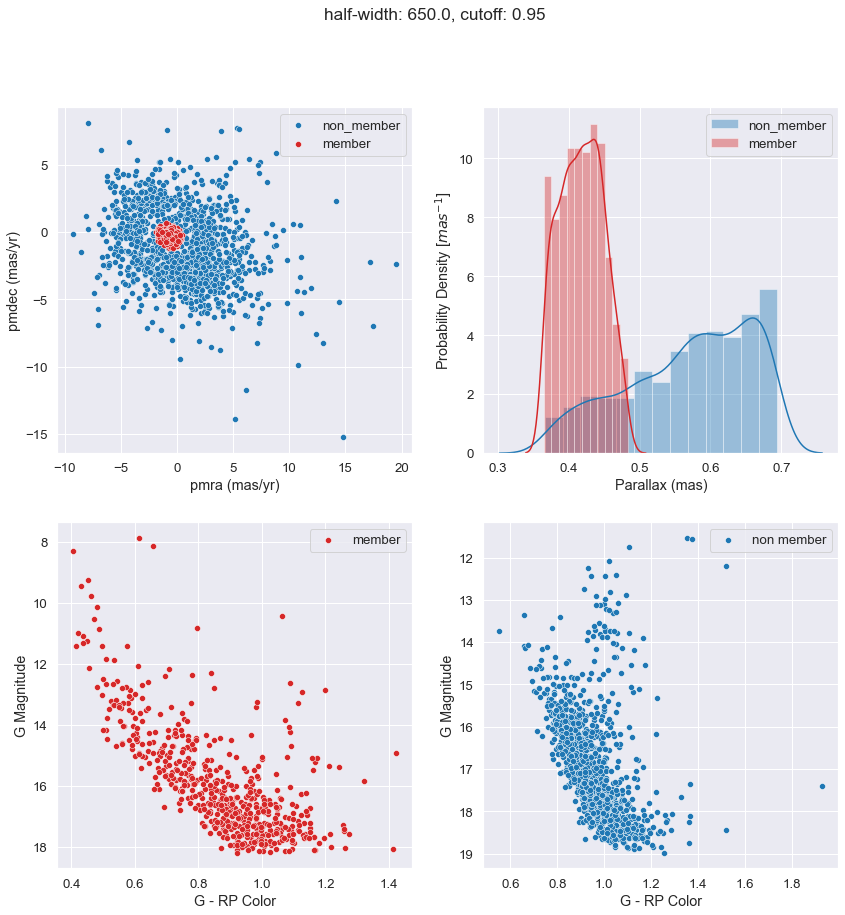

Cluster: IC_1805
member_by_GMM    574
cantat           456
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 136




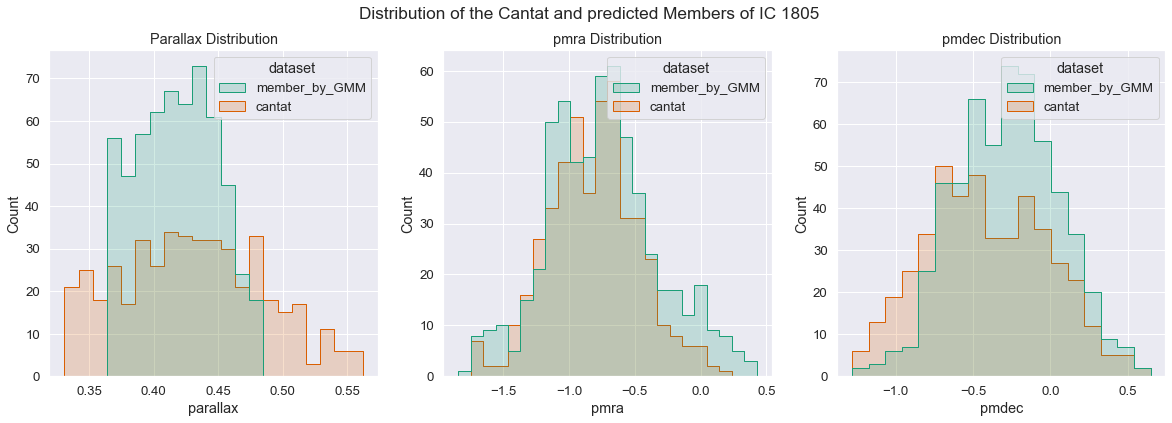

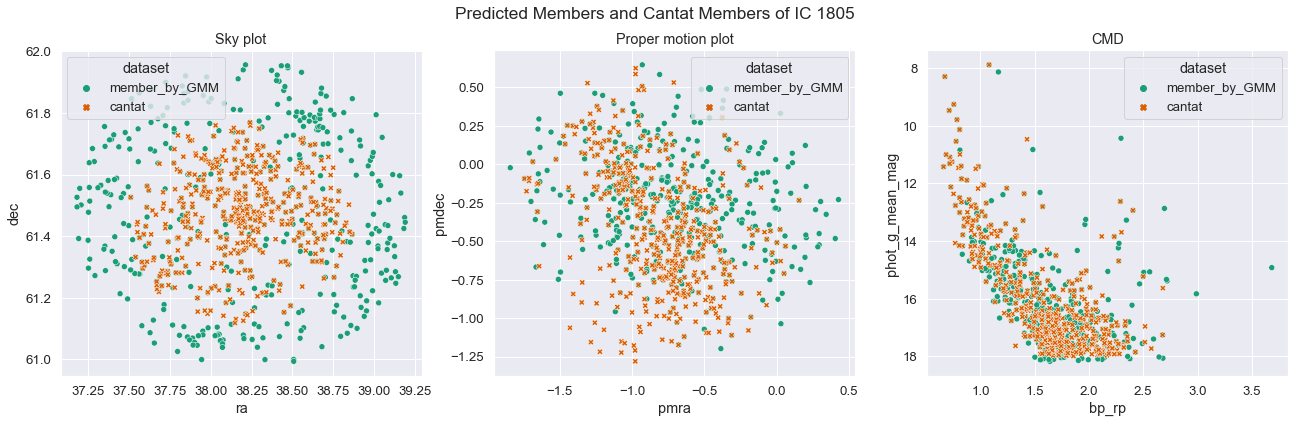

Object Name: NGC_1893
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (80.724, 33.444)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 33484


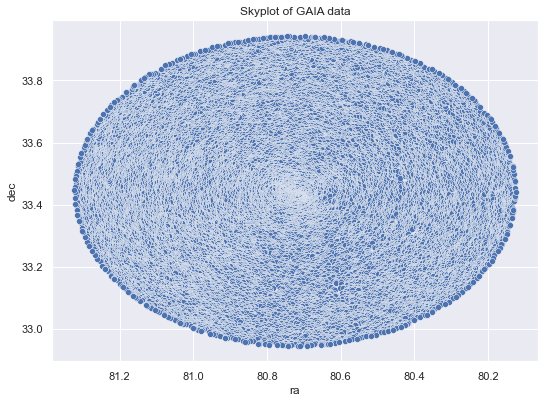

Number of stars after applying noise filter: 6294
Number of stars after applying other filters: 6053


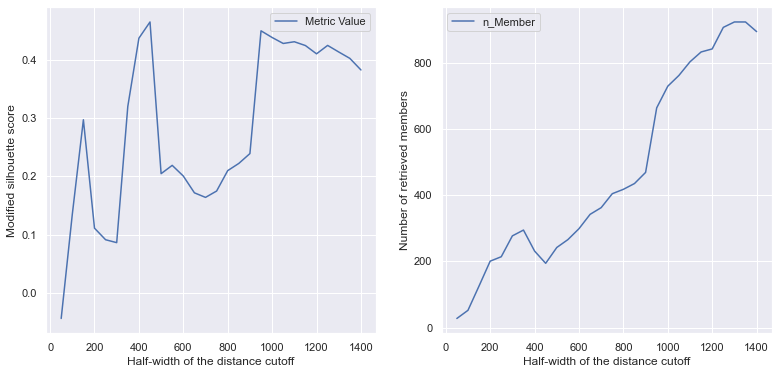

best distance half-width: 450.0


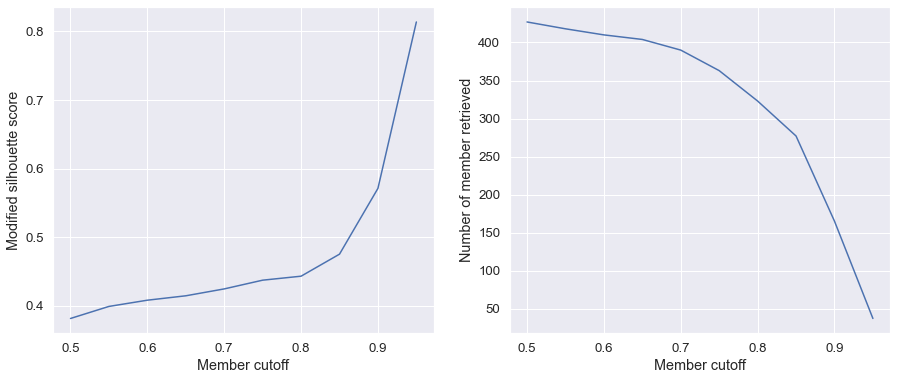

best member threshold: 0.95
number of member: 37,
 number of field star: 32,
 MSS: 0.81


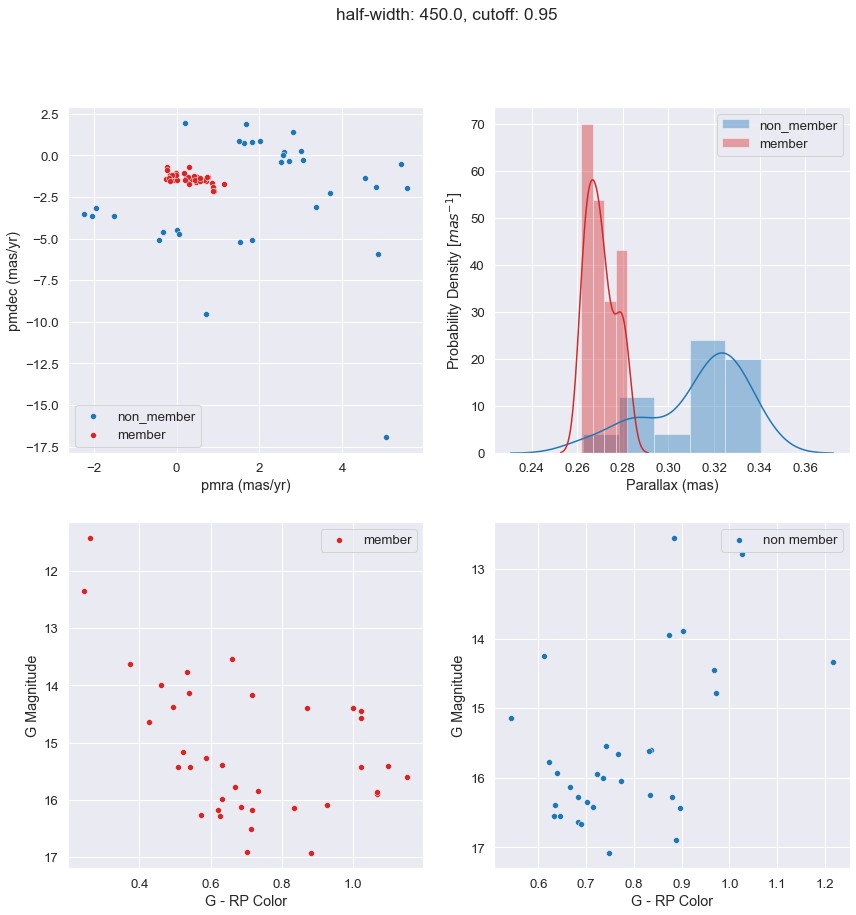

Cluster: NGC_1893
cantat           494
member_by_GMM     37
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 169




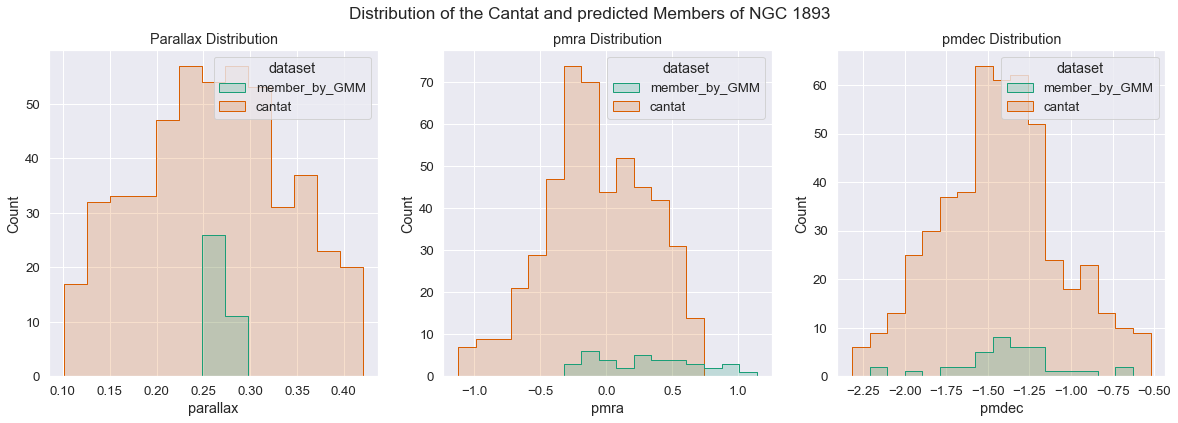

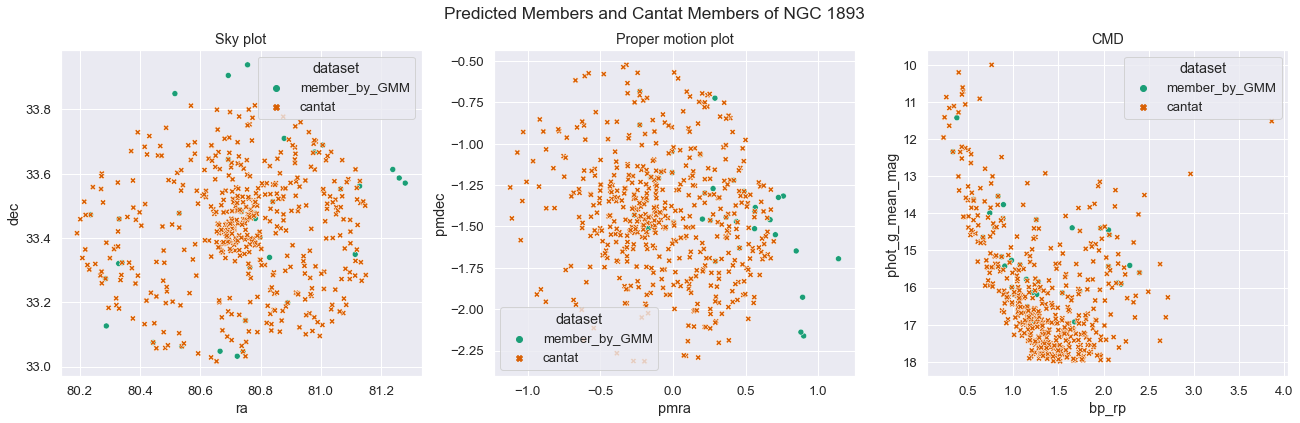

Object Name: NGC_581
Co-ordinate <SkyCoord (ICRS): (ra, dec) in deg
    (23.339, 60.659)>
INFO: Query finished. [astroquery.utils.tap.core]
Total Raw Stars: 71456


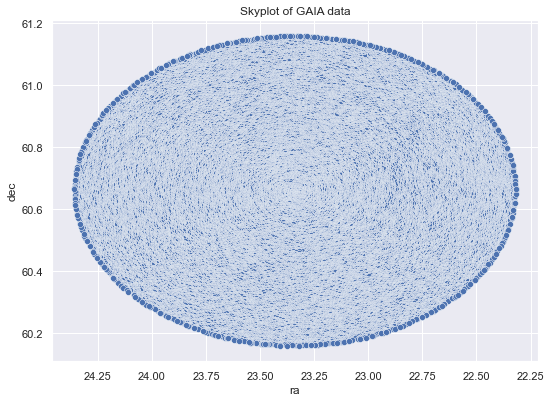

Number of stars after applying noise filter: 13822
Number of stars after applying other filters: 13379


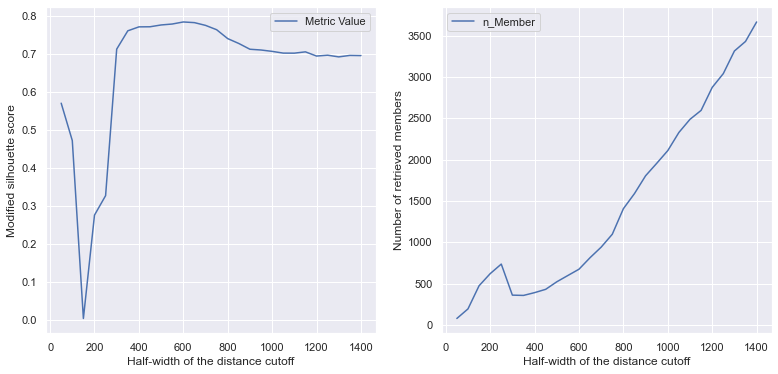

best distance half-width: 600.0


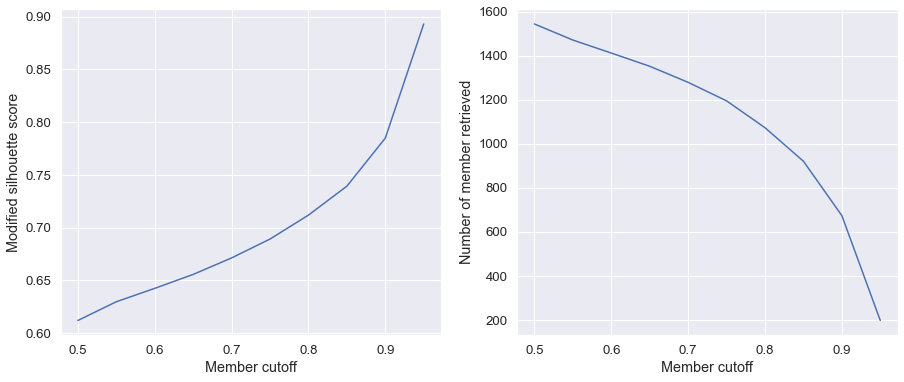

best member threshold: 0.95
number of member: 198,
 number of field star: 1868,
 MSS: 0.89


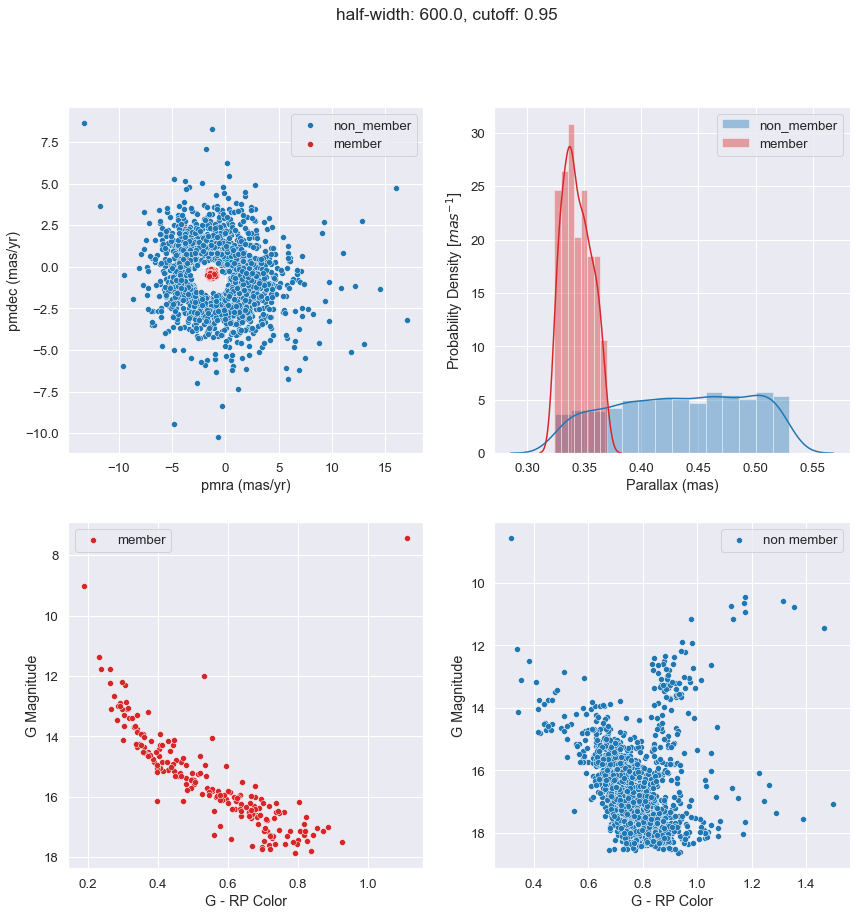

Cluster: NGC_581
cantat           306
member_by_GMM    198
Name: dataset, dtype: int64
Cantat (PMemb > 0.5): 152




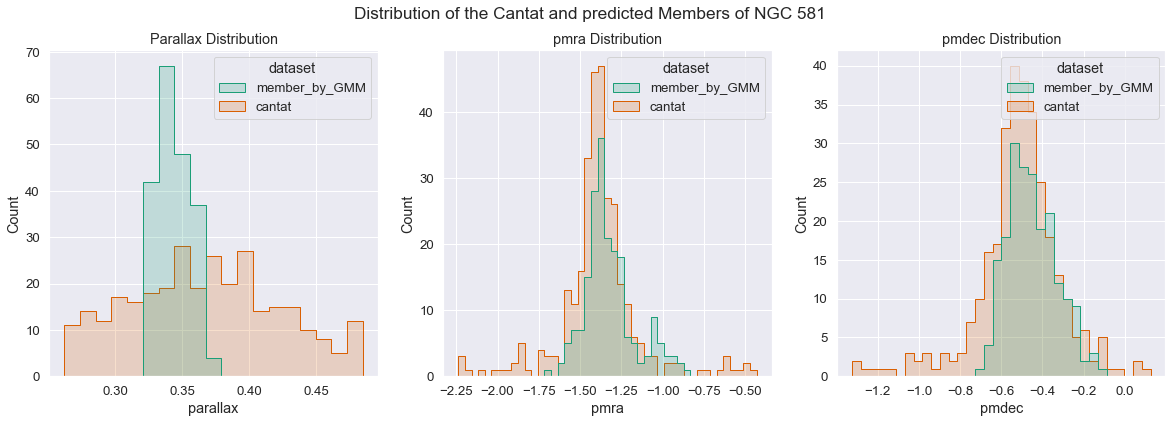

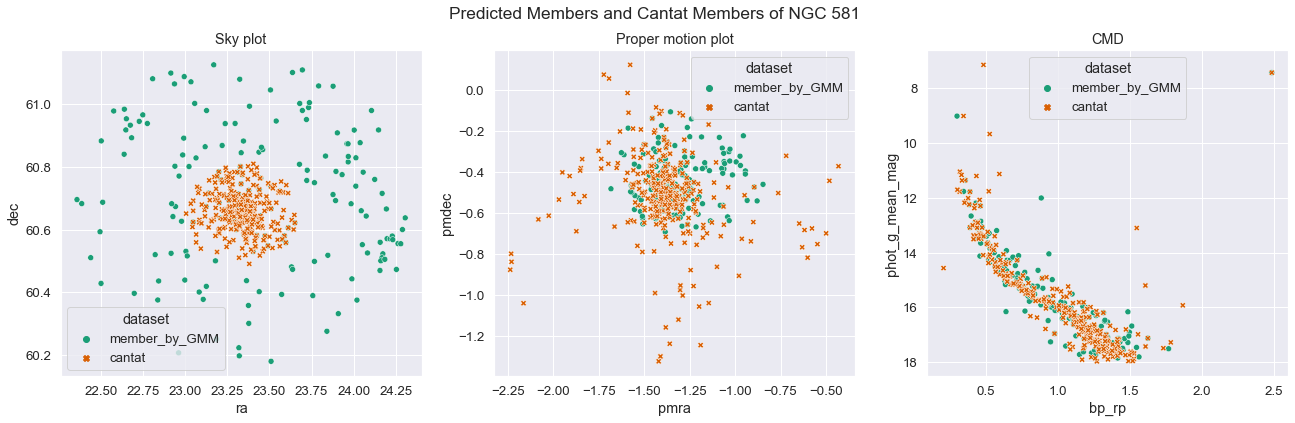

In [13]:
for i in range(5, len(selected_clusters)):
    cluster_name = selected_clusters[i]
    gmm_analysis(cluster_name)

In [36]:
all_members_gmm = pd.concat([model.member for model in gmm_models.values()]).reset_index(drop = True)
all_members_gmm.head()

solution_id                     DESIGNATION           source_id  \
0  1635721458409799680  b'Gaia DR2 604917629355038848'  604917629355038848   
1  1635721458409799680  b'Gaia DR2 604917732434252032'  604917732434252032   
2  1635721458409799680  b'Gaia DR2 604917732434325248'  604917732434325248   
3  1635721458409799680  b'Gaia DR2 604917629355039360'  604917629355039360   
4  1635721458409799680  b'Gaia DR2 604917698074587136'  604917698074587136   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0     309606362     2015.5  132.845427  0.033842  11.813721   0.022365   
1    1037136882     2015.5  132.847883  0.047155  11.818284   0.028357   
2    1685360922     2015.5  132.845628  0.023422  11.820310   0.014362   
3     340729517     2015.5  132.846939  0.039546  11.807362   0.023041   
4    1308383390     2015.5  132.840032  0.034797  11.817361   0.020084   

   parallax  ...   lum_val  lum_percentile_lower  lum_percentile_upper  \
0  1.129222  ...  5.409647              5.116649              5.702646   
1  1.113444  ...  0.286409              0.253650              0.319167   
2  1.125087  ...  3.119858              2.927116              3.312600   
3  1.111626  ...  1.604247              1.452243              1.756252   
4  1.189351  ...  0.544629              0.501133              0.588124   

                                        datalink_url      dist  g_mag_error  \
0  b'https://gea.esac.esa.int/data-server/datalin...  0.000629     0.000205   
1  b'https://gea.esac.esa.int/data-server/datalin...  0.004667     0.000698   
2  b'https://gea.esac.esa.int/data-server/datalin...  0.006326     0.000288   
3  b'https://gea.esac.esa.int/data-server/datalin...  0.006695     0.000869   
4  b'https://gea.esac.esa.int/data-server/datalin...  0.006747     0.000606   

   distance_pc     PMemb  gmm_label   Cluster  
0   885.565629  0.999500          1  NGC_2682  
1   898.114453  0.999236          1  NGC_2682  
2   888.820446  0.999405          1  NGC_2682  
3   899.583451  0.998115          1  NGC_2682  
4   840.794499  0.999512          1  NGC_2682  

[5 rows x 101 columns]

In [37]:
all_members_gmm.to_csv('all_clusters_gmm_members.csv', index = False)

In [33]:
## Save the non-members data
for model in gmm_models.values():
    model.non_member['Cluster'] = [model.cluster_name] * len(model.non_member)

In [38]:
all_non_members_gmm = pd.concat([model.non_member for model in gmm_models.values()]).reset_index(drop = True)
all_non_members_gmm.head()

solution_id                     DESIGNATION           source_id  \
0  1635721458409799680  b'Gaia DR2 604917693778923264'  604917693778923264   
1  1635721458409799680  b'Gaia DR2 604917423196681088'  604917423196681088   
2  1635721458409799680  b'Gaia DR2 604917590699705472'  604917590699705472   
3  1635721458409799680  b'Gaia DR2 604917423196609280'  604917423196609280   
4  1635721458409799680  b'Gaia DR2 604917590700906624'  604917590700906624   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0      69047986     2015.5  132.832854  0.066634  11.810440   0.040339   
1    1396391816     2015.5  132.853470  0.035284  11.801113   0.020744   
2     212057801     2015.5  132.829021  0.309143  11.806033   0.201413   
3    1065808135     2015.5  132.855667  0.034606  11.792845   0.021592   
4     250574647     2015.5  132.821077  0.292941  11.808587   0.158380   

   parallax  ...   lum_val  lum_percentile_lower  lum_percentile_upper  \
0  0.892243  ...  0.239855              0.193084              0.286626   
1  1.260482  ...  0.908870              0.839506              0.978235   
2  1.905373  ...       NaN                   NaN                   NaN   
3  1.154304  ...  6.068649              5.744357              6.392942   
4  2.089327  ...       NaN                   NaN                   NaN   

                                        datalink_url      dist  g_mag_error  \
0  b'https://gea.esac.esa.int/data-server/datalin...  0.013355     0.000899   
1  b'https://gea.esac.esa.int/data-server/datalin...  0.014809     0.000299   
2  b'https://gea.esac.esa.int/data-server/datalin...  0.018433     0.005467   
3  b'https://gea.esac.esa.int/data-server/datalin...  0.023167     0.000175   
4  b'https://gea.esac.esa.int/data-server/datalin...  0.024993     0.005028   

   distance_pc          PMemb  gmm_label   Cluster  
0  1120.771043  1.643154e-134          0  NGC_2682  
1   793.347195   2.081859e-02          0  NGC_2682  
2   524.831603   9.482690e-08          0  NGC_2682  
3   866.322848   1.100501e-06          0  NGC_2682  
4   478.623019   3.387752e-17          0  NGC_2682  

[5 rows x 101 columns]

In [39]:
all_non_members_gmm.to_csv('all_clusters_gmm_field_stars.csv', index = False)